# NOTEBOOK SUMMARY

La siguiente libreta de código será usada para crear a partir del gold dataset todas la información estadística necesaria así como la visualización gráfica que proporciona el análisis del dataset de cara a extraer conocimiento del conjunto de datos.

# IMPORTACIÓN DE LIBRERÍAS

In [84]:
# Importación de las librerías a usar durante el proyecto.

import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# LECTURA Y PARÁMETROS DE LAS RUTAS PARA EL ARVHIVO GOLD

In [95]:
# Rutas para el archivo Gold. 

gold_folder_path = os.path.join(os.curdir,"Gold")

gold_file_name = "student_habits_performance_gold.parquet"

gold_file_path = os.path.join(gold_folder_path, gold_file_name)


# Leemos el archivo parquet con los datos en gold previamente creado con la libreta Bronze generation.

student_habits_performance_gold_df = pd.read_parquet(gold_file_path)


# Muestra las 5 primeras filas del dataframe para echar un primer vistazo.

student_habits_performance_gold_df.head() 

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,exam_score_categoric
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6.0,Master,Average,8,Yes,56.2,Aprobado
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6.0,High School,Average,8,No,100.0,Sobresaliente
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1.0,High School,Poor,1,No,34.3,Suspenso
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4.0,Master,Good,1,Yes,26.8,Suspenso
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3.0,Master,Good,1,No,66.4,Aprobado


# INFO DEL DATASET

In [96]:
student_habits_performance_gold_df.info()

student_habits_performance_gold_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     998 non-null    object 
 1   age                            998 non-null    int64  
 2   gender                         998 non-null    object 
 3   study_hours_per_day            998 non-null    float64
 4   social_media_hours             998 non-null    float64
 5   netflix_hours                  998 non-null    float64
 6   part_time_job                  998 non-null    object 
 7   attendance_percentage          998 non-null    float64
 8   sleep_hours                    998 non-null    float64
 9   diet_quality                   998 non-null    object 
 10  exercise_frequency             998 non-null    float64
 11  parental_education_level       998 non-null    object 
 12  internet_quality               998 non-null    obj

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,exam_score_categoric
count,998,998.000000,998,998.000000,998.000000,998.000000,998,998.000000,998.000000,998,998.000000,998,998,998.000000,998,998.000000,998
unique,992,NaN,3,NaN,NaN,NaN,2,NaN,NaN,5,NaN,4,4,NaN,3,NaN,4
top,UNKNOWN,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN,Notable
freq,7,NaN,477,NaN,NaN,NaN,783,NaN,NaN,436,NaN,391,445,NaN,680,NaN,384
mean,NaN,20.491984,NaN,3.550000,2.504008,1.821042,NaN,84.127255,6.467735,NaN,3.043086,NaN,NaN,5.442886,NaN,69.614529,NaN
std,NaN,2.306381,NaN,1.468122,1.172864,1.075830,NaN,9.388892,1.226333,NaN,2.022726,NaN,NaN,2.846851,NaN,16.899463,NaN
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000,NaN
25%,NaN,18.250000,NaN,2.600000,1.700000,1.000000,NaN,78.025000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.500000,NaN
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000,NaN
75%,NaN,23.000000,NaN,4.500000,3.300000,2.575000,NaN,90.975000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.375000,NaN


# REPRESENTACIÓN GRÁFICA DE CARACTERÍSTICAS DEL DATASET

#### VARIABLE PRINCIPAL DATASET
Representación gráfica de la distribución de las variable principal que muestra los resultados obtenidos por el conjunto de la clase.


C:\Users\uo7823\AppData\Local\Temp\ipykernel_23244\3559562296.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_nota_categórica1=sns.barplot(data=conteo_categorías_notas1,ax=matriz_graficos0[2],order=orden_resultados1,x='exam_score_categoric',y='Nº Estudiantes', palette='Set2')


Text(0.5, 1.0, 'NOTAS CATEGÓRICAS')

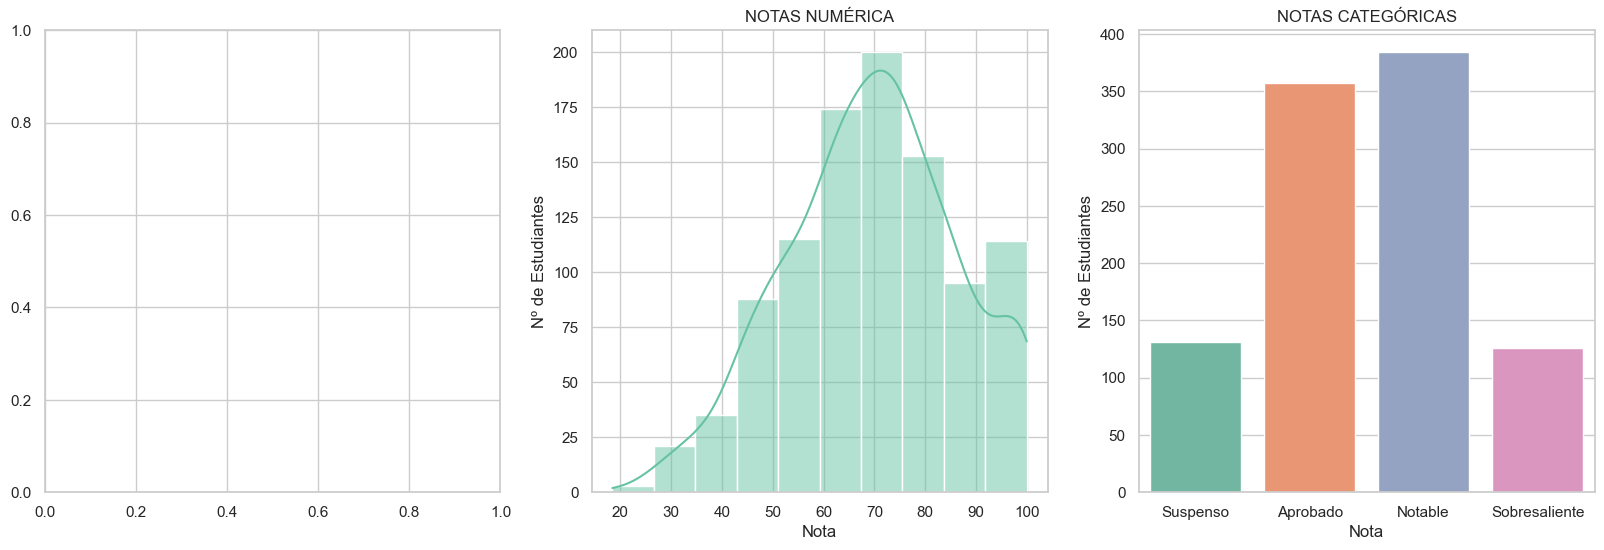

In [ ]:
# REPRESENTACIÓN VARIABLE PRINCIPAL: NOTAS

lienzo0,matriz_graficos0 =  plt.subplots(1,3,figsize=(20, 6))

# Donut aprobados vs suspensos
# gender_counts = student_habits_performance_gold_df['gender'].value_counts() # Contamos cuantos valores de cada hay en la columna.
# donut_genero = matriz_donuts[0,0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
# matriz_donuts[0,0].set_title("ESTUDIANTES SEGÚN GENERO")

# Histograma valor de la nota
histograma_nota=sns.histplot(student_habits_performance_gold_df['exam_score'],ax=matriz_graficos0[1], bins=10, kde=True)
histograma_nota.set_xlabel("Nota")
histograma_nota.set_ylabel("Nº de Estudiantes")
histograma_nota.set_title("NOTAS NUMÉRICA")

# Diagrama de barras notas categóricas
conteo_categorías_notas1 = student_habits_performance_gold_df.groupby(['exam_score_categoric']).size().reset_index(name='Nº Estudiantes')
orden_resultados1 = ['Suspenso', 'Aprobado', 'Notable', 'Sobresaliente']
barplot_nota_categórica1=sns.barplot(data=conteo_categorías_notas1,ax=matriz_graficos0[2],order=orden_resultados1,x='exam_score_categoric',y='Nº Estudiantes', palette='Set2')
barplot_nota_categórica1.set_xlabel("Nota")
barplot_nota_categórica1.set_ylabel("Nº de Estudiantes")
barplot_nota_categórica1.set_title("NOTAS CATEGÓRICAS")

#### VARIABLES NUMÉRICAS
Representación gráfica de la distribución de las variables numéricas para conocer los hábitos y el comportamiento de los estudiantes del dataset.


Text(0.5, 1.0, 'EDAD')

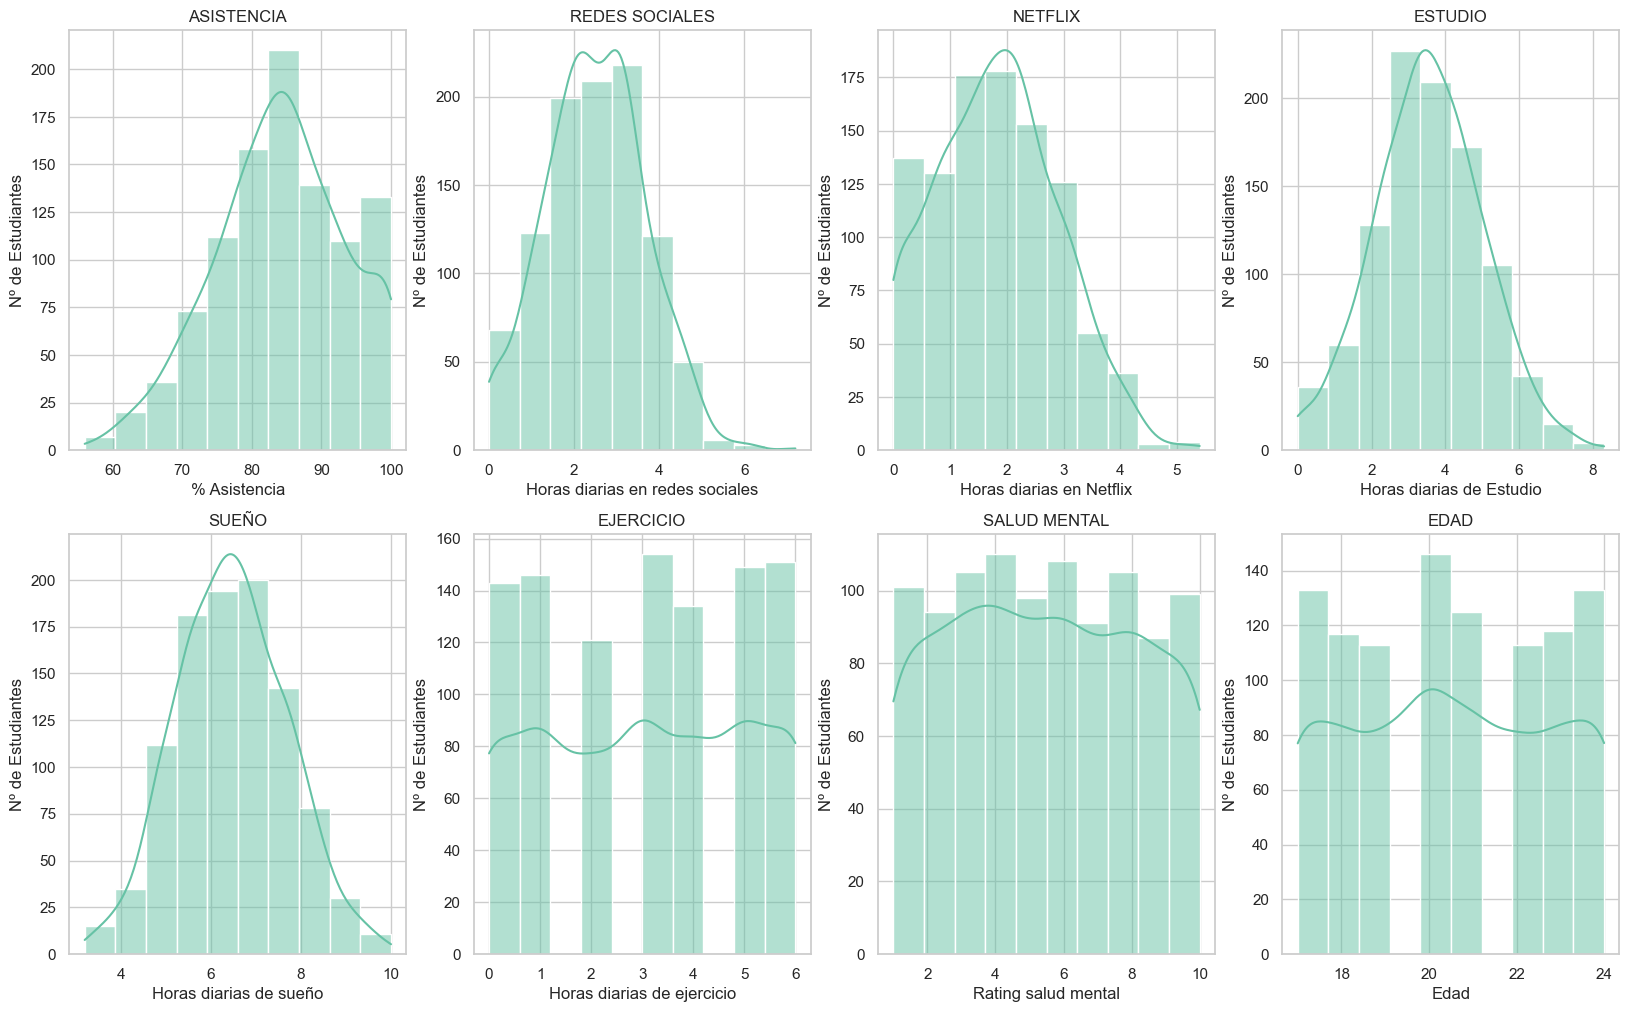

In [ ]:
lienzo1,matriz_graficos1 =  plt.subplots(2,4,figsize=(20, 12))

# HISTOGRAMA DE LA ASITENCIA
histograma_asistencia=sns.histplot(student_habits_performance_gold_df['attendance_percentage'],ax=matriz_graficos1[0,0], bins=10, kde=True)
histograma_asistencia.set_xlabel("% Asistencia")
histograma_asistencia.set_ylabel("Nº de Estudiantes")
histograma_asistencia.set_title("ASISTENCIA")

# HISTOGRAMA DE USO DE REDES SOCIALES
histograma_social_media=sns.histplot(student_habits_performance_gold_df['social_media_hours'], ax=matriz_graficos1[0,1], bins=10, kde=True)
histograma_social_media.set_xlabel("Horas diarias en redes sociales")
histograma_social_media.set_ylabel("Nº de Estudiantes")
histograma_social_media.set_title("REDES SOCIALES")

# HISTOGRAMA DE USO DE NETFLIX
histograma_netflix=sns.histplot(student_habits_performance_gold_df['netflix_hours'],ax=matriz_graficos1[0,2], bins=10, kde=True)
histograma_netflix.set_xlabel("Horas diarias en Netflix")
histograma_netflix.set_ylabel("Nº de Estudiantes")
histograma_netflix.set_title("NETFLIX")

# HISTOGRAMA DE HORAS DE ESTUDIO
histograma_estudio=sns.histplot(student_habits_performance_gold_df['study_hours_per_day'],ax=matriz_graficos1[0,3], bins=10, kde=True)
histograma_estudio.set_xlabel("Horas diarias de Estudio")
histograma_estudio.set_ylabel("Nº de Estudiantes")
histograma_estudio.set_title("ESTUDIO")

# HISTOGRAMA DE HORAS DE SUEÑO
histograma_sueño=sns.histplot(student_habits_performance_gold_df['sleep_hours'],ax=matriz_graficos1[1,0], bins=10, kde=True)
histograma_sueño.set_xlabel("Horas diarias de sueño")
histograma_sueño.set_ylabel("Nº de Estudiantes")
histograma_sueño.set_title("SUEÑO")

# HISTOGRAMA DE FRECUENCIA DE EJERCICIO
histograma_ejercicio=sns.histplot(student_habits_performance_gold_df['exercise_frequency'],ax=matriz_graficos1[1,1], bins=10, kde=True)
histograma_ejercicio.set_xlabel("Horas diarias de ejercicio")
histograma_ejercicio.set_ylabel("Nº de Estudiantes")
histograma_ejercicio.set_title("EJERCICIO")

# HISTOGRAMA DE SALUD MENTAL
histograma_ejercicio=sns.histplot(student_habits_performance_gold_df['mental_health_rating'],ax=matriz_graficos1[1,2], bins=10, kde=True)
histograma_ejercicio.set_xlabel("Rating salud mental")
histograma_ejercicio.set_ylabel("Nº de Estudiantes")
histograma_ejercicio.set_title("SALUD MENTAL")

# HISTOGRAMA DE RESULTADOS
histograma_edad=sns.histplot(student_habits_performance_gold_df['age'],ax=matriz_graficos1[1,3], bins=10, kde=True)
histograma_edad.set_xlabel("Edad")
histograma_edad.set_ylabel("Nº de Estudiantes")
histograma_edad.set_title("EDAD")

#### VARIABLES CATEGÓRICAS

Representación gráfica del comportamiento y distribución de las variables categóricas para conocer los hábitos, la naturaleza y el comportamiento de los estudiantes del dataset.


Text(0.5, 1.0, 'NIVEL DE EDUCACIÓN DE LOS PADRES')

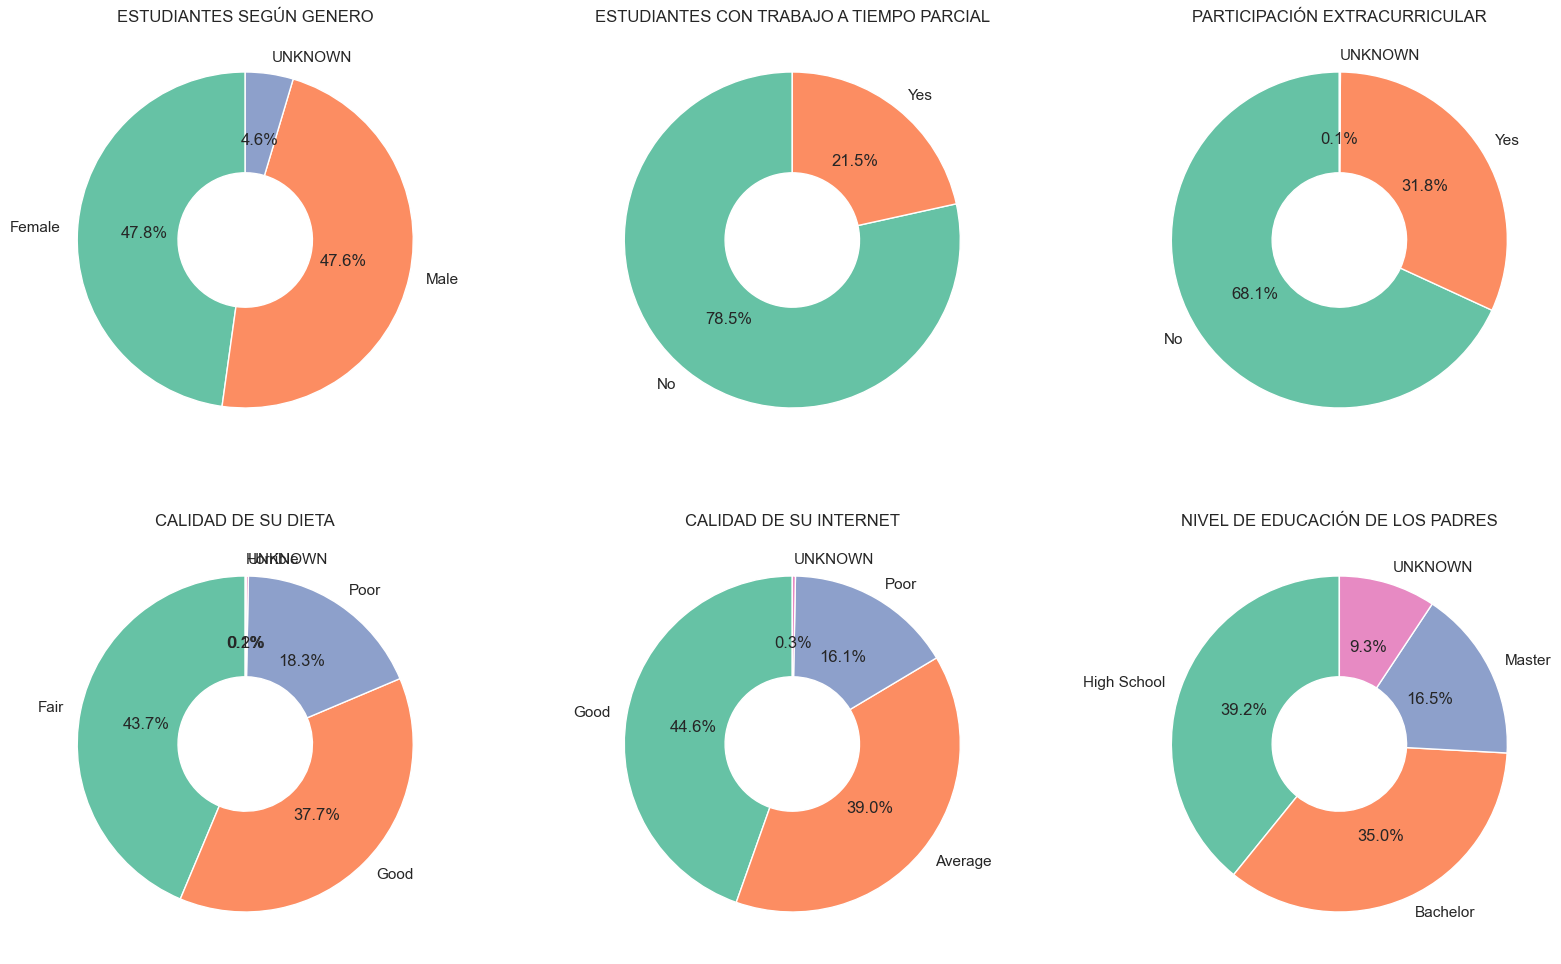

In [151]:
lienzo3, matriz_donuts = plt.subplots(2,3,figsize=(20, 12))


# DONUT GÉNERO
gender_counts = student_habits_performance_gold_df['gender'].value_counts() # Contamos cuantos valores de cada hay en la columna.
donut_genero = matriz_donuts[0,0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
matriz_donuts[0,0].set_title("ESTUDIANTES SEGÚN GENERO")

# DONUT TRABAJO A TIEMPO PARCIAL
part_time_job_counts = student_habits_performance_gold_df['part_time_job'].value_counts() # Contamos cuantos valores de cada hay en la columna.
donut_part_time_job = matriz_donuts[0,1].pie(part_time_job_counts,labels=part_time_job_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
matriz_donuts[0,1].set_title("ESTUDIANTES CON TRABAJO A TIEMPO PARCIAL")

# DONUT PARTICIPACIÓN EXTRACURRICULAR
extracurricular_participation_counts = student_habits_performance_gold_df['extracurricular_participation'].value_counts() # Contamos cuantos valores de cada hay en la columna.
donut_participacion_extracurricular = matriz_donuts[0,2].pie(extracurricular_participation_counts,labels=extracurricular_participation_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
matriz_donuts[0,2].set_title("PARTICIPACIÓN EXTRACURRICULAR")

# DONUT CALIDAD DE DIETA
diet_quality_counts = student_habits_performance_gold_df['diet_quality'].value_counts() # Contamos cuantos valores de cada hay en la columna.
donut_diet_quality = matriz_donuts[1,0].pie(diet_quality_counts,labels=diet_quality_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
matriz_donuts[1,0].set_title("CALIDAD DE SU DIETA")

# DONUT CALIDAD DEL INTERNET
internet_quality_counts = student_habits_performance_gold_df['internet_quality'].value_counts() # Contamos cuantos valores de cada hay en la columna.
donut_internet_quality = matriz_donuts[1,1].pie(internet_quality_counts,labels=internet_quality_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
matriz_donuts[1,1].set_title("CALIDAD DE SU INTERNET")

# DONUT EDUCACIÓN DE LOS PADRES
parental_education_level_counts = student_habits_performance_gold_df['parental_education_level'].value_counts() # Contamos cuantos valores de cada hay en la columna.
donut_parental_education_level = matriz_donuts[1,2].pie(parental_education_level_counts,labels=parental_education_level_counts.index, autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.6))
matriz_donuts[1,2].set_title("NIVEL DE EDUCACIÓN DE LOS PADRES")

# ANÁLISIS CORRELACIÓN DE VARIABLES NUMÉRICAS CON LA NOTA DE EXAMEN

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[ True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True]
 [False False False False False False  True  True  True]
 [False False False False False False False  True  True]
 [False False False False False False False False  True]]


Text(0.5, 1.0, 'CORRELACIONES ENTRE VARIABLES NUMÉRICAS')

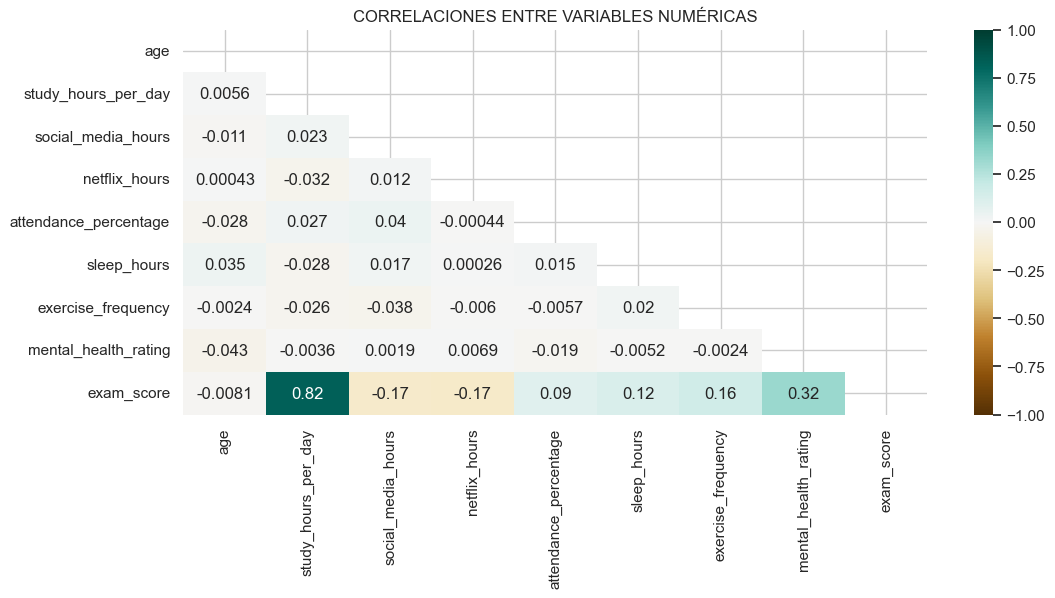

In [97]:
# El heatmap de correlaciones solo podremos hacerlo con las variables numéricas, así que debemos excluir las categóricas.
student_habits_performance_gold_onlynumerics_df = student_habits_performance_gold_df.select_dtypes(exclude=['object', 'category','datetime'])

#Como vamos a dibujar una gráfica haremos un lienzo 1x1
lienzo,matriz_graficos = plt.subplots(1,1,figsize=(12, 5))

# Primero tenemos que crear la matriz de correlaciones. Se hace así:
matrix_correlation = student_habits_performance_gold_onlynumerics_df.corr()

#También podemos crear la matriz de correlaciones para ver solo la parte de abajo de la gráfica ya que solo nos interesa una parte. Cortando la gráfica a la mitad no perderíamos info y la visualización mejoraría.
half_matrix_correlation = np.triu(np.ones_like(student_habits_performance_gold_onlynumerics_df.corr()))
mask = np.triu(np.ones_like(student_habits_performance_gold_onlynumerics_df.corr(), dtype=np.bool))
print(half_matrix_correlation)
print(mask)

#Cortando la gráfica a la mitad no perderíamos info y la visualización mejoraría.
heatmap_correlaciones_mitad = sns.heatmap(student_habits_performance_gold_onlynumerics_df.corr(),ax=matriz_graficos, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_correlaciones_mitad.set_title("CORRELACIONES ENTRE VARIABLES NUMÉRICAS")

Text(0, 0.5, 'Nota')

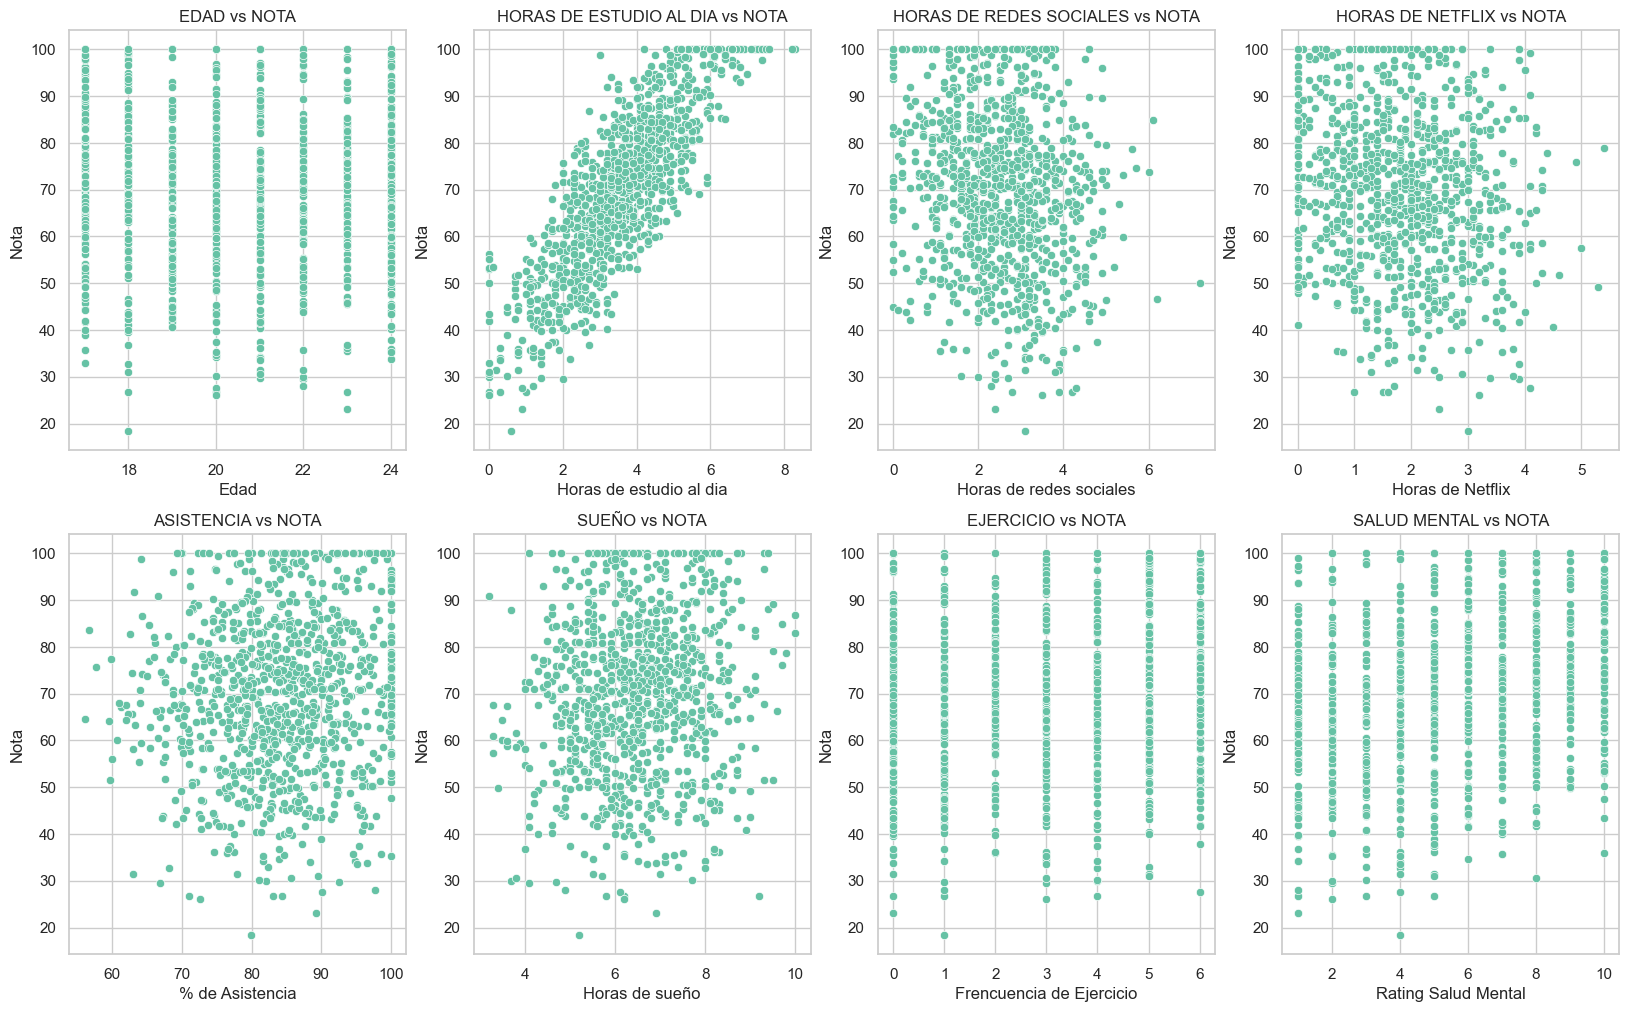

In [98]:
lienzo,matriz_graficos = plt.subplots(2,4,figsize=(20, 12))

# Gráfico de dispersión para EDAD vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[0,0],x="age",y="exam_score") 
scatter_edadvsnota.set_title("EDAD vs NOTA")
scatter_edadvsnota.set_xlabel("Edad")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para HORAS DE ESTUDIO AL DIA vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[0,1],x="study_hours_per_day",y="exam_score") 
scatter_edadvsnota.set_title("HORAS DE ESTUDIO AL DIA vs NOTA")
scatter_edadvsnota.set_xlabel("Horas de estudio al dia")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para HORAS DE REDES SOCIALES vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[0,2],x="social_media_hours",y="exam_score") 
scatter_edadvsnota.set_title("HORAS DE REDES SOCIALES vs NOTA")
scatter_edadvsnota.set_xlabel("Horas de redes sociales")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para HORAS DE NETFLIX vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[0,3],x="netflix_hours",y="exam_score") 
scatter_edadvsnota.set_title("HORAS DE NETFLIX vs NOTA")
scatter_edadvsnota.set_xlabel("Horas de Netflix")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para HORAS DE NETFLIX vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[1,0],x="attendance_percentage",y="exam_score") 
scatter_edadvsnota.set_title("ASISTENCIA vs NOTA")
scatter_edadvsnota.set_xlabel("% de Asistencia")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para HORAS DE SUEÑO vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[1,1],x="sleep_hours",y="exam_score") 
scatter_edadvsnota.set_title("SUEÑO vs NOTA")
scatter_edadvsnota.set_xlabel("Horas de sueño")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para FRECUENCIA DE EJERCICIO vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[1,2],x="exercise_frequency",y="exam_score") 
scatter_edadvsnota.set_title("EJERCICIO vs NOTA")
scatter_edadvsnota.set_xlabel("Frencuencia de Ejercicio")
scatter_edadvsnota.set_ylabel("Nota")

# Gráfico de dispersión para FRECUENCIA DE EJERCICIO vs NOTA
scatter_edadvsnota = sns.scatterplot(data=student_habits_performance_gold_df,ax=matriz_graficos[1,3],x="mental_health_rating",y="exam_score") 
scatter_edadvsnota.set_title("SALUD MENTAL vs NOTA")
scatter_edadvsnota.set_xlabel("Rating Salud Mental")
scatter_edadvsnota.set_ylabel("Nota")

Tanto el mapa de calor de correlaciones como los gráficos de densidad de las distintas variables enfrentadas a la nota de examen muestran claramente que:

La correlacion más clara y muy fuerte es la de las horas de estudio. A más horas de estudio mejores son los resultados de las notas y esto se ve muy claramente reflejado en los graficos.

Se aprecia también una muy ligera y debil correlacion inversamente proporcional entre las horas de netflix y redes sociales con los resultados de las notas.

Y también muy debil pero directamente proporcional entre la asitencia, el ejercicio y la salud mental con la nota.

# ANÁLISIS CORRELACIÓN PARA LAS VARIABLES CATEGÓRICAS CON LA NOTA DE EXAMEN

In [99]:
# Utilizaremos la técnica estadística llamada ANOVA para intentar calcular la relación entre las variables categóricas y la nota de examen. 
    # F-statistic alto + p-value bajo → hay diferencias significativas entre los grupos y podría significar que existe alguna relación entre un grupo y un valor más alto o bajo de la nota.
    # F-statistic bajo + p-value alto → no hay evidencia suficiente para decir que los grupos son diferentes.
    # Si el p-value es menor que 0.05 (umbral común), se considera que hay una diferencia estadísticamente significativa entre los grupos.

# ANOVA Y TUKEY para 'gender'
anova_result = stats.f_oneway(
    *[student_habits_performance_gold_df[student_habits_performance_gold_df['gender'] == categoria]['exam_score'] for categoria in student_habits_performance_gold_df['gender'].unique()]
)
tukey_gender = pairwise_tukeyhsd(student_habits_performance_gold_df["exam_score"],student_habits_performance_gold_df["gender"],alpha=0.05)

print("CORRELACIÓN GENDER VS NOTA")
print("Gender F-statistic:", anova_result.statistic)
print("Gender p-value:", anova_result.pvalue)
print("Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa")
print()

# ANOVA y TUKEY para 'part_time_job'
anova_result = stats.f_oneway(
    *[student_habits_performance_gold_df[student_habits_performance_gold_df['part_time_job'] == categoria]['exam_score'] for categoria in student_habits_performance_gold_df['part_time_job'].unique()]
)
tukey_part_time_job = pairwise_tukeyhsd(student_habits_performance_gold_df["exam_score"],student_habits_performance_gold_df["part_time_job"],alpha=0.05)

print("CORRELACIÓN PART_TIME_JOB VS NOTA")
print("Part_time_job F-statistic:", anova_result.statistic)
print("Part_time_job p-value:", anova_result.pvalue)
print("Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa")
print()

# ANOVA y TUKEY para 'diet_quality'
anova_result = stats.f_oneway(
    *[student_habits_performance_gold_df[student_habits_performance_gold_df['diet_quality'] == categoria]['exam_score'] for categoria in student_habits_performance_gold_df['diet_quality'].unique()]
)
tukey_diet_quality = pairwise_tukeyhsd(student_habits_performance_gold_df["exam_score"],student_habits_performance_gold_df["diet_quality"],alpha=0.05)
print("CORRELACIÓN DIET_QUALITY VS NOTA")
print("diet_quality F-statistic:", anova_result.statistic)
print("diet_quality p-value:", anova_result.pvalue)
print("Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa")
print()

# ANOVA y TUKEY para 'parental_education_level'
anova_result = stats.f_oneway(
    *[student_habits_performance_gold_df[student_habits_performance_gold_df['parental_education_level'] == categoria]['exam_score'] for categoria in student_habits_performance_gold_df['parental_education_level'].unique()]
)
tukey_parental_education_level = pairwise_tukeyhsd(student_habits_performance_gold_df["exam_score"],student_habits_performance_gold_df["parental_education_level"],alpha=0.05)
print("CORRELACIÓN PARENTAL_EDUCATION_LEVEL VS NOTA")
print("parental_education_level F-statistic:", anova_result.statistic)
print("parental_education_level p-value:", anova_result.pvalue)
print("Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa")
print()

# ANOVA y TUKEY para 'internet_quality'
anova_result = stats.f_oneway(
    *[student_habits_performance_gold_df[student_habits_performance_gold_df['internet_quality'] == categoria]['exam_score'] for categoria in student_habits_performance_gold_df['internet_quality'].unique()]
)
tukey_internet_quality = pairwise_tukeyhsd(student_habits_performance_gold_df["exam_score"],student_habits_performance_gold_df["internet_quality"],alpha=0.05)
print("INTENERT_QUALITY VS NOTA")
print("internet_quality F-statistic:", anova_result.statistic)
print("internet_quality p-value:", anova_result.pvalue)
print("Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa")
print()

# ANOVA y TUKEY para 'extracurricular_participation'
anova_result = stats.f_oneway(
    *[student_habits_performance_gold_df[student_habits_performance_gold_df['extracurricular_participation'] == categoria]['exam_score'] for categoria in student_habits_performance_gold_df['extracurricular_participation'].unique()]
)
tukey_extracurricular_participation = pairwise_tukeyhsd(student_habits_performance_gold_df["exam_score"],student_habits_performance_gold_df["extracurricular_participation"],alpha=0.05)
print("EXTRACURRICULAR_PARTICIPATION VS NOTA")
print("extracurricular_participation F-statistic:", anova_result.statistic)
print("extracurricular_participation p-value:", anova_result.pvalue)
print("Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa")
print()
print ("Las variables que parecen tener más influencia en la nota final son por orden de mayor influencia la calidad del internet, tener un trabajo a tiempo partido y más ligeramente la calidad de la dieta y la educación parental.")

CORRELACIÓN GENDER VS NOTA
Gender F-statistic: 0.375182295249393
Gender p-value: 0.6872611711355474
Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa

CORRELACIÓN PART_TIME_JOB VS NOTA
Part_time_job F-statistic: 0.7282018287978739
Part_time_job p-value: 0.3936718390600229
Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa

CORRELACIÓN DIET_QUALITY VS NOTA
diet_quality F-statistic: 0.7543573265936008
diet_quality p-value: 0.5551704713657903
Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa

CORRELACIÓN PARENTAL_EDUCATION_LEVEL VS NOTA
parental_education_level F-statistic: 0.6556152687428252
parental_education_level p-value: 0.5795164066788432
Tukey no devuelve ninguna categoria que se relacione con la nota de manera significativa

INTENERT_QUALITY VS NOTA
internet_quality F-statistic: 1.1856267709402386
internet_quality p-value: 0.31403999538376415
Tukey no devuelve ningun

C:\Users\uo7823\AppData\Local\Temp\ipykernel_23244\858044286.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_gendervsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[0,0],x="gender",y="exam_score")
C:\Users\uo7823\AppData\Local\Temp\ipykernel_23244\858044286.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_part_time_jobvsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[0,1],x="part_time_job",y="exam_score")
C:\Users\uo7823\AppData\Local\Temp\ipykernel_23244\858044286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

Text(0, 0.5, 'Nota')

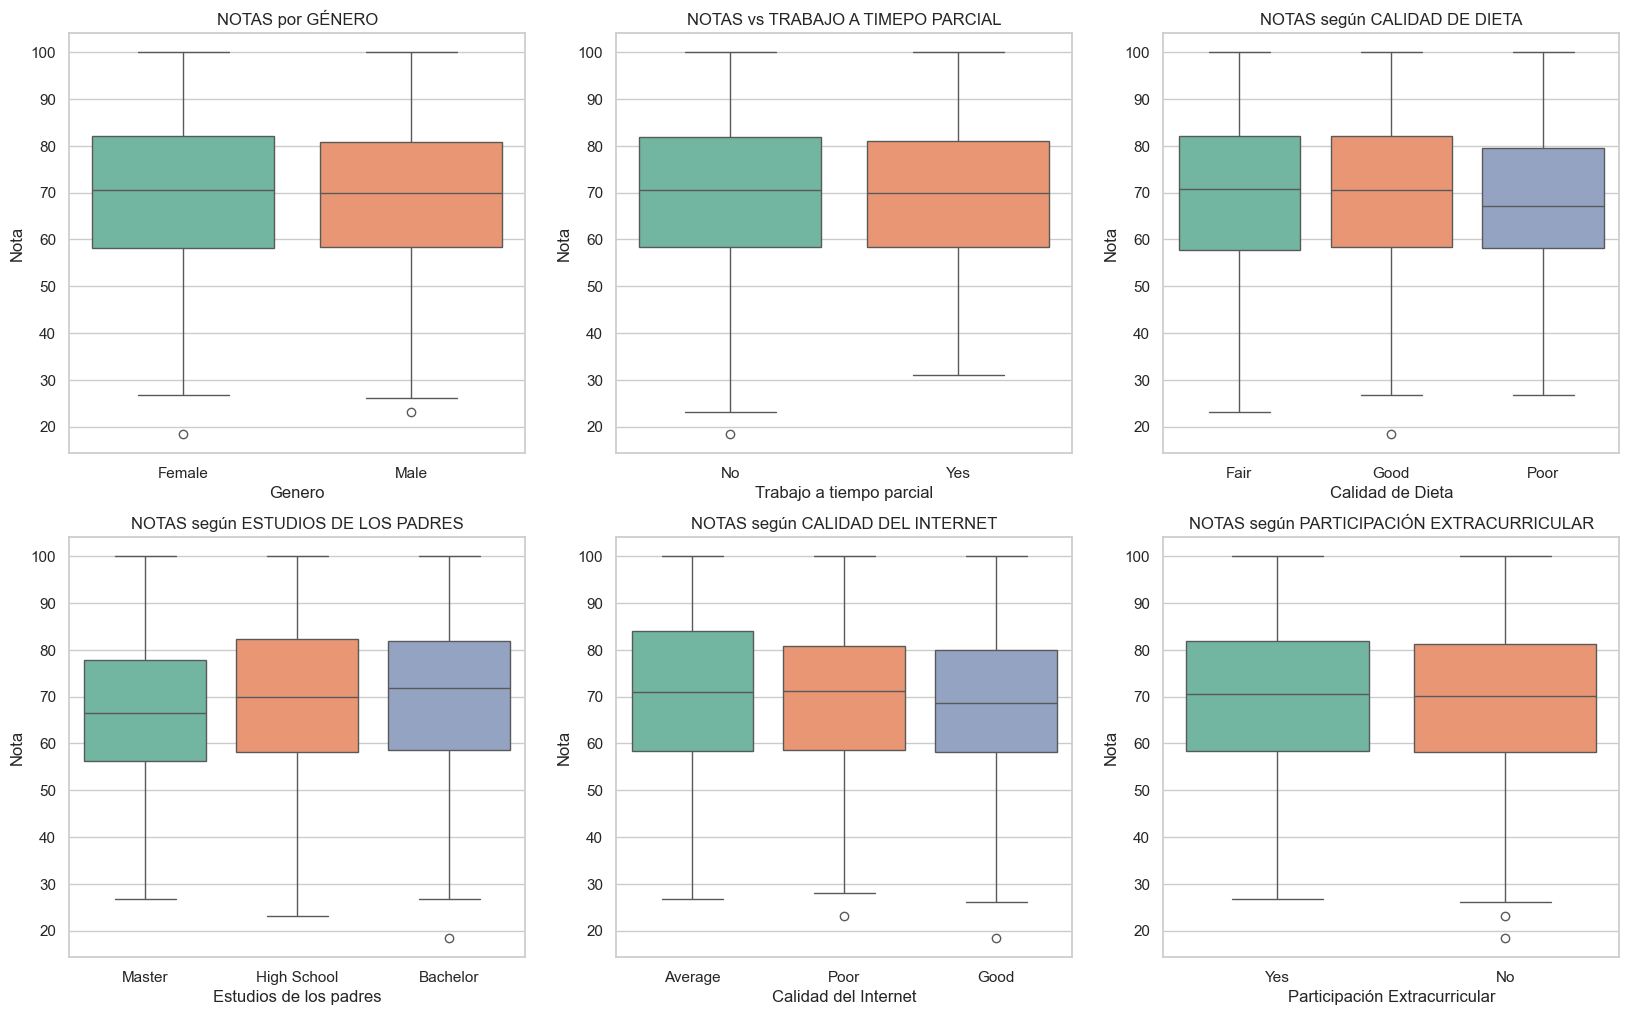

In [100]:
# Para representar las variables categóricas es mejor que quitemos los valores que sean "UNKNOWN".
student_habits_performance_gold_nounknowns_df = student_habits_performance_gold_df[~student_habits_performance_gold_df.apply(lambda row: row.astype(str).eq('UNKNOWN').any(), axis=1)]

lienzo2,matriz_graficos2 = plt.subplots(2,3,figsize=(20, 12))

# Boxplot para NOTAS por GENERO
boxplot_gendervsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[0,0],x="gender",y="exam_score") 
boxplot_gendervsnota.set_title("NOTAS por GÉNERO")
boxplot_gendervsnota.set_xlabel("Genero")
boxplot_gendervsnota.set_ylabel("Nota")

# Boxplot para NOTAS en función de si tienen trabajo a tiempo parcial
boxplot_part_time_jobvsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[0,1],x="part_time_job",y="exam_score") 
boxplot_part_time_jobvsnota.set_title("NOTAS vs TRABAJO A TIMEPO PARCIAL")
boxplot_part_time_jobvsnota.set_xlabel("Trabajo a tiempo parcial")
boxplot_part_time_jobvsnota.set_ylabel("Nota")

# Boxplot para NOTAS en función de la calidad de la dieta
boxplot_diet_qualityvsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[0,2],x="diet_quality",y="exam_score") 
boxplot_diet_qualityvsnota.set_title("NOTAS según CALIDAD DE DIETA")
boxplot_diet_qualityvsnota.set_xlabel("Calidad de Dieta")
boxplot_diet_qualityvsnota.set_ylabel("Nota")

# Boxplot para NOTAS en función de la educación de los padres
boxplot_parental_education_levelvsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[1,0],x="parental_education_level",y="exam_score") 
boxplot_parental_education_levelvsnota.set_title("NOTAS según ESTUDIOS DE LOS PADRES")
boxplot_parental_education_levelvsnota.set_xlabel("Estudios de los padres")
boxplot_parental_education_levelvsnota.set_ylabel("Nota")

# Boxplot para NOTAS en función de la calidad del internet.
boxplot_internet_qualityvsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[1,1],x="internet_quality",y="exam_score") 
boxplot_internet_qualityvsnota.set_title("NOTAS según CALIDAD DEL INTERNET")
boxplot_internet_qualityvsnota.set_xlabel("Calidad del Internet")
boxplot_internet_qualityvsnota.set_ylabel("Nota")

# Boxplot para NOTAS en función de la participación extracurricular.
boxplot_extracurricular_participationvsnota = sns.boxplot(palette="Set2",data=student_habits_performance_gold_nounknowns_df,ax=matriz_graficos2[1,2],x="extracurricular_participation",y="exam_score") 
boxplot_extracurricular_participationvsnota.set_title("NOTAS según PARTICIPACIÓN EXTRACURRICULAR")
boxplot_extracurricular_participationvsnota.set_xlabel("Participación Extracurricular")
boxplot_extracurricular_participationvsnota.set_ylabel("Nota")

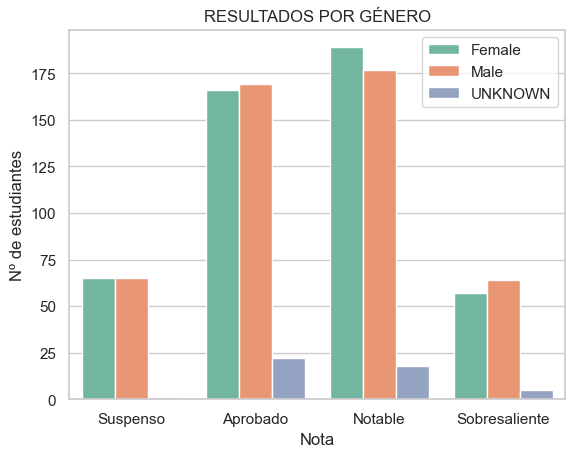

In [114]:
# El siguiente codigo construye un diagrama de barras según hombre y mujer donde se representan el número de suspensos, notables, etc.

# Agrupamos por género y categoría de nota y las ordenamos
conteo_categorías_notas = student_habits_performance_gold_df.groupby(['gender', 'exam_score_categoric']).size().reset_index(name='Nº Estudiantes')
orden_resultados = ['Suspenso', 'Aprobado', 'Notable', 'Sobresaliente']

# Creamos el lienzo y matriz de gráficos
lienzo4, matriz_graficos4 = plt.subplots()

# Gráfico de barras agrupadas
bar_plot_notasvssexo = sns.barplot(data=conteo_categorías_notas,ax=matriz_graficos4,order=orden_resultados,x='exam_score_categoric',y='Nº Estudiantes',hue='gender',palette='Set2')
bar_plot_notasvssexo.set_title("RESULTADOS POR GÉNERO")
bar_plot_notasvssexo.set_xlabel("Nota")
bar_plot_notasvssexo.set_ylabel("Nº de estudiantes")
bar_plot_notasvssexo.legend()